#Import&Installs

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 15.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=94fafce869eb82baa74dedfc8658f1f50e8c7fb7b2893a3ca5e4c66b97b20e92
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
import json
import pyspark
from pyspark.sql import SparkSession
from itertools import combinations
from pyspark.sql.functions import concat, col, lit, udf, split
import matplotlib.pyplot as plt
from pyspark.sql.types import *
from pyspark.ml.classification import FMClassifier
from pyspark.ml.clustering import KMeans, LDA, GaussianMixture, PowerIterationClustering
from pyspark.ml.evaluation import ClusteringEvaluator,  MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler, Imputer , StandardScaler,OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.classification import LogisticRegression, GBTClassifier, NaiveBayes, RandomForestClassifier, LinearSVC, OneVsRest

In [ ]:
from pyspark.sql import functions as F

In [ ]:
!pip install -U --no-cache-dir gdown --pre
!gdown "1m3xE5EIpXEFsvcuEP8JlVaEGCjuEA9ye"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
From: https://drive.google.com/uc?id=1m3xE5EIpXEFsvcuEP8JlVaEGCjuEA9ye
To: /content/all_movies.json
100% 190M/190M [00:01<00:00, 142MB/s]


In [ ]:
#!unzip 'TestData.zip'

#Create Spark Session

In [ ]:
spark = SparkSession \
    .builder \
    .appName("Final-Project_Machine Learning") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

#Load Data

In [ ]:
# Read JSON file into dataframe
Maindf = spark.read.json("/content/all_movies.json")

In [ ]:
Maindf.schema

StructType([StructField('_corrupt_record', StringType(), True), StructField('adult', BooleanType(), True), StructField('backdrop_path', StringType(), True), StructField('belongs_to_collection', StructType([StructField('backdrop_path', StringType(), True), StructField('id', LongType(), True), StructField('name', StringType(), True), StructField('poster_path', StringType(), True)]), True), StructField('budget', LongType(), True), StructField('genres', ArrayType(StructType([StructField('id', LongType(), True), StructField('name', StringType(), True)]), True), True), StructField('homepage', StringType(), True), StructField('id', LongType(), True), StructField('imdb_id', StringType(), True), StructField('original_language', StringType(), True), StructField('original_title', StringType(), True), StructField('overview', StringType(), True), StructField('popularity', DoubleType(), True), StructField('poster_path', StringType(), True), StructField('production_companies', ArrayType(StructType([S

In [ ]:
Maindf.show(5)

+--------------------+-----+--------------------+---------------------+--------+--------------------+--------------------+----+---------+-----------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+------------+--------+-------+--------------------+--------+--------------------+--------------------+-----+------------+----------+
|     _corrupt_record|adult|       backdrop_path|belongs_to_collection|  budget|              genres|            homepage|  id|  imdb_id|original_language|      original_title|            overview|popularity|         poster_path|production_companies|production_countries|release_date| revenue|runtime|    spoken_languages|  status|             tagline|               title|video|vote_average|vote_count|
+--------------------+-----+--------------------+---------------------+--------+--------------------+--------------------+----+---------+-----------------+--------------------+----------------

In [ ]:
Maindf.printSchema()

root
 |-- _corrupt_record: string (nullable = true)
 |-- adult: boolean (nullable = true)
 |-- backdrop_path: string (nullable = true)
 |-- belongs_to_collection: struct (nullable = true)
 |    |-- backdrop_path: string (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- poster_path: string (nullable = true)
 |-- budget: long (nullable = true)
 |-- genres: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- id: long (nullable = true)
 |    |    |-- name: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- id: long (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: double (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- production_companies: array (nullable = true)
 |    |-- element: struct (containsNull = tru

In [ ]:
Maindf.select(['budget']).show(10)

+--------+
|  budget|
+--------+
|    null|
|       0|
| 4000000|
|21000000|
|   42000|
|       0|
|11000000|
|94000000|
|55000000|
|15000000|
+--------+
only showing top 10 rows



In [ ]:
Maindf.select(['genres']).show(10)

+--------------------+
|              genres|
+--------------------+
|                null|
|[{18, Drama}, {35...|
|[{80, Crime}, {35...|
|[{28, Action}, {8...|
| [{99, Documentary}]|
|       [{18, Drama}]|
|[{12, Adventure},...|
|[{16, Animation},...|
|[{35, Comedy}, {1...|
|       [{18, Drama}]|
+--------------------+
only showing top 10 rows



# Data Preprocessing

In [ ]:
def TurntoGenres(genres):
  if genres != None:
    return ",".join([genre[1] for genre in genres])
MyFunc = udf(lambda x:TurntoGenres(x),StringType()) 

In [ ]:
testdf = Maindf.withColumn("genres", MyFunc(Maindf['genres']))

In [ ]:
testdf.show(5)

+--------------------+-----+--------------------+---------------------+--------+--------------------+--------------------+----+---------+-----------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+------------+--------+-------+--------------------+--------+--------------------+--------------------+-----+------------+----------+
|     _corrupt_record|adult|       backdrop_path|belongs_to_collection|  budget|              genres|            homepage|  id|  imdb_id|original_language|      original_title|            overview|popularity|         poster_path|production_companies|production_countries|release_date| revenue|runtime|    spoken_languages|  status|             tagline|               title|video|vote_average|vote_count|
+--------------------+-----+--------------------+---------------------+--------+--------------------+--------------------+----+---------+-----------------+--------------------+----------------

In [ ]:
def TurntoCompany(Company):
  if Company != None:
    return ",".join([genre[2] for genre in Company])
MyFunc1 = udf(lambda x:TurntoCompany(x),StringType()) 

In [ ]:
testdf = testdf.withColumn("production_companies", MyFunc1(testdf['production_companies']))

In [ ]:
testdf.show(5)

+--------------------+-----+--------------------+---------------------+--------+--------------------+--------------------+----+---------+-----------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+------------+--------+-------+--------------------+--------+--------------------+--------------------+-----+------------+----------+
|     _corrupt_record|adult|       backdrop_path|belongs_to_collection|  budget|              genres|            homepage|  id|  imdb_id|original_language|      original_title|            overview|popularity|         poster_path|production_companies|production_countries|release_date| revenue|runtime|    spoken_languages|  status|             tagline|               title|video|vote_average|vote_count|
+--------------------+-----+--------------------+---------------------+--------+--------------------+--------------------+----+---------+-----------------+--------------------+----------------

In [ ]:
testdf.printSchema()

root
 |-- _corrupt_record: string (nullable = true)
 |-- adult: boolean (nullable = true)
 |-- backdrop_path: string (nullable = true)
 |-- belongs_to_collection: struct (nullable = true)
 |    |-- backdrop_path: string (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- poster_path: string (nullable = true)
 |-- budget: long (nullable = true)
 |-- genres: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- id: long (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: double (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- iso_3166_1: string (nullable = true)
 |    |    |-- name: string 

In [ ]:
#testdf = testdf.withColumn('Result', ( testdf['revenue'] - testdf['budget'] ))
#testdf.show(5)

+--------------------+-----+--------------------+---------------------+--------+--------------------+--------------------+----+---------+-----------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+------------+--------+-------+--------------------+--------+--------------------+--------------------+-----+------------+----------+--------+
|     _corrupt_record|adult|       backdrop_path|belongs_to_collection|  budget|              genres|            homepage|  id|  imdb_id|original_language|      original_title|            overview|popularity|         poster_path|production_companies|production_countries|release_date| revenue|runtime|    spoken_languages|  status|             tagline|               title|video|vote_average|vote_count|  Result|
+--------------------+-----+--------------------+---------------------+--------+--------------------+--------------------+----+---------+-----------------+-------------------

In [ ]:
testdf = testdf.withColumn(
    "Result",
    F.when( ( testdf['revenue'] - testdf['budget'] ) < 0, 0).when( ( testdf['revenue'] - testdf['budget'] ) >= 0, 1))

In [ ]:
testdf.show(5)

+--------------------+-----+--------------------+---------------------+--------+--------------------+--------------------+----+---------+-----------------+--------------------+--------------------+----------+--------------------+--------------------+--------------------+------------+--------+-------+--------------------+--------+--------------------+--------------------+-----+------------+----------+------+
|     _corrupt_record|adult|       backdrop_path|belongs_to_collection|  budget|              genres|            homepage|  id|  imdb_id|original_language|      original_title|            overview|popularity|         poster_path|production_companies|production_countries|release_date| revenue|runtime|    spoken_languages|  status|             tagline|               title|video|vote_average|vote_count|Result|
+--------------------+-----+--------------------+---------------------+--------+--------------------+--------------------+----+---------+-----------------+--------------------+--

In [ ]:
df_selected = testdf.select(["adult","budget","original_language","popularity","status","runtime",
                             "vote_average","vote_count","Result"])

In [ ]:
df_selected = df_selected.dropna()

In [ ]:
df_selected.show(5)

+-----+--------+-----------------+----------+--------+-------+------------+----------+------+
|adult|  budget|original_language|popularity|  status|runtime|vote_average|vote_count|Result|
+-----+--------+-----------------+----------+--------+-------+------------+----------+------+
|false|       0|               fi|    32.525|Released|     74|       7.274|       208|     1|
|false| 4000000|               en|    45.378|Released|     98|       5.713|      2280|     1|
|false|21000000|               en|    36.186|Released|    109|        6.57|       272|     0|
|false|   42000|               en|     2.471|Released|     80|       7.738|        21|     0|
|false|       0|               de|     1.703|Released|     15|       7.429|        14|     1|
+-----+--------+-----------------+----------+--------+-------+------------+----------+------+
only showing top 5 rows



# Pipeline

In [ ]:
'''
OHE = OneHotEncoder(inputCols=['adult', 'original_language', 'status'],
                    outputCols=['adult_Encoded', 'original_language_Encoded', 'status_Encoded'])
vec_assembler = VectorAssembler(inputCols=['adult_Encoded', 'original_language_Encoded', 'status_Encoded',
                                           'budget','popularity','runtime','vote_average','vote_count'],
                                 outputCol="features")
'''

In [ ]:
vec_assembler = VectorAssembler(inputCols=['budget','popularity','runtime','vote_average','vote_count'],
                                 outputCol="features")
# 'budget','popularity','runtime','vote_average','vote_count'

In [ ]:
# Make the pipeline
final_pipe = Pipeline(stages=[vec_assembler])

In [ ]:
piped_data = final_pipe.fit(df_selected).transform(df_selected)

In [ ]:
piped_data.show(5)

+-----+--------+-----------------+----------+--------+-------+------------+----------+------+--------------------+
|adult|  budget|original_language|popularity|  status|runtime|vote_average|vote_count|Result|            features|
+-----+--------+-----------------+----------+--------+-------+------------+----------+------+--------------------+
|false|       0|               fi|    32.525|Released|     74|       7.274|       208|     1|[32.525,74.0,7.27...|
|false| 4000000|               en|    45.378|Released|     98|       5.713|      2280|     1|[45.378,98.0,5.71...|
|false|21000000|               en|    36.186|Released|    109|        6.57|       272|     0|[36.186,109.0,6.5...|
|false|   42000|               en|     2.471|Released|     80|       7.738|        21|     0|[2.471,80.0,7.738...|
|false|       0|               de|     1.703|Released|     15|       7.429|        14|     1|[1.703,15.0,7.429...|
+-----+--------+-----------------+----------+--------+-------+------------+-----

In [ ]:
piped_dataset = piped_data.withColumnRenamed("Result", "label")

In [ ]:
model_data = piped_dataset.select(['label','features'])

In [ ]:
model_data.show(10)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    1|[32.525,74.0,7.27...|
|    1|[45.378,98.0,5.71...|
|    0|[36.186,109.0,6.5...|
|    0|[2.471,80.0,7.738...|
|    1|[1.703,15.0,7.429...|
|    1|[101.642,121.0,8....|
|    1|[111.513,100.0,7....|
|    1|[93.339,142.0,8.4...|
|    1|[48.472,122.0,8.0...|
|    1|[42.766,119.0,8.0...|
+-----+--------------------+
only showing top 10 rows



## Models

### Model Building (Logistic Regression)

In [ ]:
training, test = model_data.randomSplit([.7, .3])
training.count()

113492

In [ ]:
lr = LogisticRegression(featuresCol='features', labelCol='label')
model = lr.fit(training)

### Model Evaluation

In [ ]:
trainingSummary = model.summary
roc = trainingSummary.roc.toPandas()

In [ ]:
roc

,FPR,TPR
0,0.000000,0.000000
1,0.000000,0.000822
2,0.000000,0.001606
3,0.000312,0.002372
4,0.000935,0.003119
...,...,...
1001,0.984721,0.998861
1002,0.992049,0.999206
1003,0.997350,0.999673
1004,1.000000,1.000000


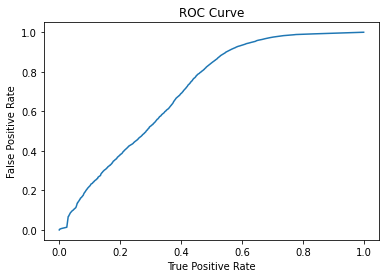

In [ ]:

plt.clf()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

Training set areaUnderROC: 0.7064053720739305


Text(0.5, 0, 'Recall')

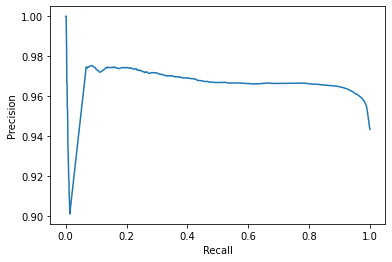

In [ ]:
plt.clf()
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')


In [ ]:
summary = model.evaluate(test)

In [ ]:
summary.accuracy

0.9422861876164838

In [ ]:
output = model.transform(test)
output

DataFrame[label: int, features: vector, rawPrediction: vector, probability: vector, prediction: double]

In [ ]:
output.show(10)

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|    0|(5,[0,1],[50570.0...|[-3.4546846939700...|[0.03062945846000...|       1.0|
|    0|(5,[0,1],[450000....|[-3.4095349702736...|[0.03199879859296...|       1.0|
|    0|(5,[0,1],[2.5E8,1...|[18.8905342954934...|[0.99999999374906...|       0.0|
|    0|[1.0,0.6,100.0,5....|[-2.8427457237699...|[0.05505751361217...|       1.0|
|    0|[1.0,1.273,81.0,8...|[-2.6511211021635...|[0.06591994457682...|       1.0|
|    0|[1.0,1.663,93.0,5...|[-2.8216286361298...|[0.05616653411735...|       1.0|
|    0|[1.0,3.254,90.0,5...|[-2.8370757504974...|[0.05535324596868...|       1.0|
|    0|[1.0,4.842,100.0,...|[-2.6349223982593...|[0.06692441274748...|       1.0|
|    0|[2.0,0.6,119.0,5....|[-2.7452887624580...|[0.06035327527504...|       1.0|
|    0|[2.0,0.62

In [ ]:
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(output))

Test Area Under ROC 0.7098857448253633


### Model Building (Gradient-Boosted Tree Classifier)

In [ ]:
gbt = GBTClassifier(labelCol="label", featuresCol="features", maxIter=10)

In [ ]:
model = gbt.fit(training)

In [ ]:
prediction = model.transform(test)

binEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("label")
    
binEval.evaluate(prediction)

0.9821495133568027

### Model Building (Random Forest)

In [ ]:
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=50)

model = rf.fit(training)

In [ ]:
prediction = model.transform(test)

binEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("label")
    
binEval.evaluate(prediction)

0.9819424311451647

### Model Building (Support Vector Machines)

In [ ]:
SVC = LinearSVC(labelCol="label", featuresCol="features", maxIter=10, regParam=0.1)

model = SVC.fit(training)

In [ ]:
prediction = model.transform(test)

binEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("label")
    
binEval.evaluate(prediction)

0.9423483122799752

In [ ]:
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))

Coefficients: [-1.0646188841583517e-09,1.135942457103688e-05,0.0,0.0,1.1425605427364915e-05]
Intercept: 0.9999188381412827


### Model Building (One vs All)

In [ ]:
lr = LogisticRegression(maxIter=10, tol=1E-6, fitIntercept=True)

ovr = OneVsRest(classifier=lr)

model = ovr.fit(training)

In [ ]:
prediction = model.transform(test)

binEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("label")
    
binEval.evaluate(prediction)

0.9422654793953199

### Model Building (Naive Bayes)

In [ ]:
NB = NaiveBayes(smoothing=1.0, modelType="multinomial")

NBmodel = ovr.fit(training)

In [ ]:
prediction = NBmodel.transform(test)

binEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("label")
    
binEval.evaluate(prediction)

0.9422654793953199

### Model Building (FM Classifier)

In [ ]:
from pyspark.ml.classification import FMClassifier

In [ ]:
FM = FMClassifier(labelCol="label", featuresCol="features", stepSize=0.001)

FMmodel = FM.fit(training)

In [ ]:
prediction = FMmodel.transform(test)

binEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("label")
    
binEval.evaluate(prediction)

0.9700766204183061